# IS362 Assignment Week 12

## Importing necessary libraries

In [1]:
# Import pandas and numpy
import pandas as pd
import numpy as np
%matplotlib inline

## Getting the Mushroom dataframe

In [2]:
df_cols =['edible_or_poisonous','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
df = pd.read_csv('/Users/vguan/Documents/SPS/IS362/Week 12/data/agaricus-lepiota.csv', names = df_cols)
df.head(10)

,edible_or_poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


## Selecting edible_or_poisonous, odor and habitat columns from the dataframe

In [3]:
data = df[['edible_or_poisonous', 'odor', 'habitat']]
data.head(10)

,edible_or_poisonous,odor,habitat
0,p,p,u
1,e,a,g
2,e,l,m
3,p,p,u
4,e,n,g
5,e,a,g
6,e,a,m
7,e,l,m
8,p,p,g
9,e,a,m


## Giving numeric values 

In [85]:
data_num =data.replace({'edible_or_poisonous':{'e':0,'p':1},'odor':{'a':3,'l':4,'c':5,'y':6,'f':7,'m':8,'n':9,'p':10,'s':11},'habitat':{'g':12,'l':13,'m':14,'p':15,'u':16,'w':17,'d':18}})
data_num.head(20)

,edible_or_poisonous,odor,habitat
0,1,10,16
1,0,3,12
2,0,4,14
3,1,10,16
4,0,9,12
5,0,3,12
6,0,3,14
7,0,4,14
8,1,10,12
9,0,3,14


## Finding edibles data

In [92]:
edible=data_num.edible_or_poisonous == 0
df_edible = data_num[edible]
df_edible

,edible_or_poisonous,odor,habitat
1,0,3,12
2,0,4,14
4,0,9,12
5,0,3,12
6,0,3,14
...,...,...,...
8115,0,9,13
8119,0,9,13
8120,0,9,13
8121,0,9,13


## Distribution of edibles by odor

In [48]:
df_edible_odor = df_edible[['edible_or_poisonous', 'odor']]
df_edible_odor.groupby('odor').count()

,edible_or_poisonous
odor,
3,400
4,400
9,3408


In [122]:
e_odor= df_edible_odor.value_counts()
e_odor

edible_or_poisonous  odor
0                    9       3408
                     4        400
                     3        400
dtype: int64

<AxesSubplot:xlabel='edible_or_poisonous,odor'>

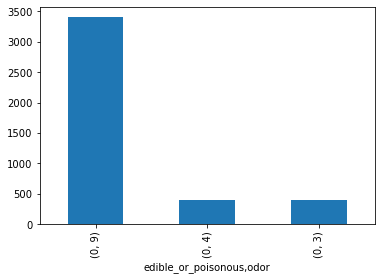

In [123]:
e_odor.plot.bar()

## Distribution of edibles by habitat

In [76]:
df_edible_habitat = df_edible[['edible_or_poisonous','habitat']]
df_edible_habitat.groupby('habitat').count()

,edible_or_poisonous
habitat,
12,1408
13,240
14,256
15,136
16,96
17,192
18,1880


In [119]:
e_habitat= df_edible_habitat.value_counts()
e_habitat

edible_or_poisonous  habitat
0                    18         1880
                     12         1408
                     14          256
                     13          240
                     17          192
                     15          136
                     16           96
dtype: int64

<AxesSubplot:xlabel='edible_or_poisonous,habitat'>

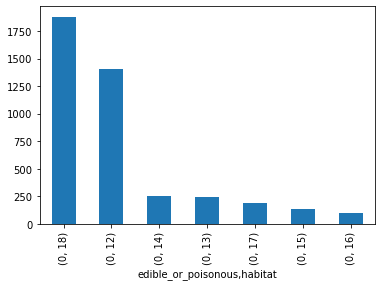

In [121]:
e_habitat.plot.bar()

## Finding poisonous data

In [95]:
poisonous=data_num.edible_or_poisonous == 1
df_poisonous = data_num[poisonous]
df_poisonous

,edible_or_poisonous,odor,habitat
0,1,10,16
3,1,10,16
8,1,10,12
13,1,10,16
17,1,10,12
...,...,...,...
8114,1,8,18
8116,1,11,13
8117,1,6,18
8118,1,7,18


## Distribution of poisonous by odor

In [98]:
df_poisonous_odor = df_poisonous[['edible_or_poisonous', 'odor']]
df_poisonous_odor.groupby('odor').count()

,edible_or_poisonous
odor,
5,192
6,576
7,2160
8,36
9,120
10,256
11,576


In [116]:
p_odor= df_poisonous_odor.value_counts()
p_odor

edible_or_poisonous  odor
1                    7       2160
                     11       576
                     6        576
                     10       256
                     5        192
                     9        120
                     8         36
dtype: int64

<AxesSubplot:xlabel='edible_or_poisonous,odor'>

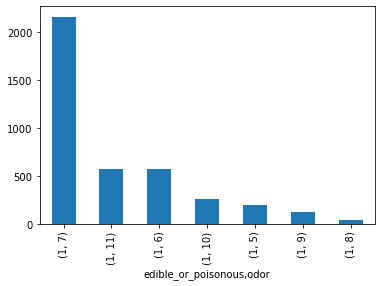

In [118]:
p_odor.plot.bar()

## Distribution of poisonous by habitat

In [107]:
df_poisonous_habitat = df_poisonous[['edible_or_poisonous','habitat']]
df_poisonous_habitat.groupby('habitat').count()

,edible_or_poisonous
habitat,
12,740
13,592
14,36
15,1008
16,272
18,1268


In [113]:
p_habitat= df_poisonous_habitat.value_counts()
p_habitat

edible_or_poisonous  habitat
1                    18         1268
                     15         1008
                     12          740
                     13          592
                     16          272
                     14           36
dtype: int64

<AxesSubplot:xlabel='edible_or_poisonous,habitat'>

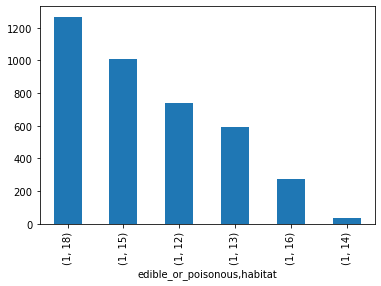

In [115]:
p_habitat.plot.bar()

## As per the initial analysis the odor and habitat are providing some ideas to determine if the mushrooms are edible or poisonous. Because we are only using either if the mushroom is edible(0) or poisonous (1) Scatter graph are not very helpful to visualize the information. 